In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt



In [2]:
data = pd.read_csv('BITRE_Fatality-Table 1.csv')
data.head()

/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_1647/1511047806.py:1: DtypeWarning: Columns (10,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('BITRE_Fatality-Table 1.csv')


,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2021,National LGA Name 2021,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20245021,WA,4,2024,Friday,00:31,Single,No,No,No,...,19,NaN,NaN,NaN,NaN,No,No,17_to_25,Weekday,Night
1,20245021,WA,4,2024,Friday,00:31,Single,No,No,No,...,9,NaN,NaN,NaN,NaN,No,No,0_to_16,Weekday,Night
2,20245021,WA,4,2024,Friday,00:31,Single,No,No,No,...,21,NaN,NaN,NaN,NaN,No,No,17_to_25,Weekday,Night
3,20245021,WA,4,2024,Friday,00:31,Single,No,No,No,...,45,NaN,NaN,NaN,NaN,No,No,40_to_64,Weekday,Night
4,20243023,Qld,4,2024,Friday,01:00,Single,No,No,No,...,24,Outer Regional Australia,Cairns,Cairns,Local Road,No,No,17_to_25,Weekday,Night


In [3]:


data['Year'] = data['Year'].astype(int)
data['Month'] = data['Month'].astype(int)
data['Age Group'] = data['Age Group'].astype(str)

data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

fatalities_by_state_month = data.groupby(['Date', 'Age Group']).size().reset_index(name='Fatalities')

actual_2024_q1 = fatalities_by_state_month[(fatalities_by_state_month['Date'] >= '2024-01-01') & (fatalities_by_state_month['Date'] <= '2024-12-31')]
actual_2024_q1 = actual_2024_q1.pivot(index='Date', columns='Age Group', values='Fatalities').fillna(0)
print('Actual fatalities for Q1 2024:')
print(actual_2024_q1)


Actual fatalities for Q1 2024:
Age Group   -9  0_to_16  17_to_25  26_to_39  40_to_64  65_to_74  75_or_older
Date                                                                        
2024-01-01   3        6        16        22        26        12           13
2024-02-01   5        6        15        32        38        10            7
2024-03-01   2        4        24        21        37        12           13
2024-04-01   2        8        18        18        31        19           18


01:19:33 - cmdstanpy - INFO - Chain [1] start processing
01:19:33 - cmdstanpy - INFO - Chain [1] done processing


Predictions for 0_to_16 - Q1 2024:
            ds      yhat  yhat_lower  yhat_upper
418 2024-01-01  4.004203   -2.724083   11.189954
419 2024-02-01  2.834237   -3.750277    9.078068
420 2024-03-01  3.912925   -2.593346   10.794634


<Figure size 1000x600 with 0 Axes>

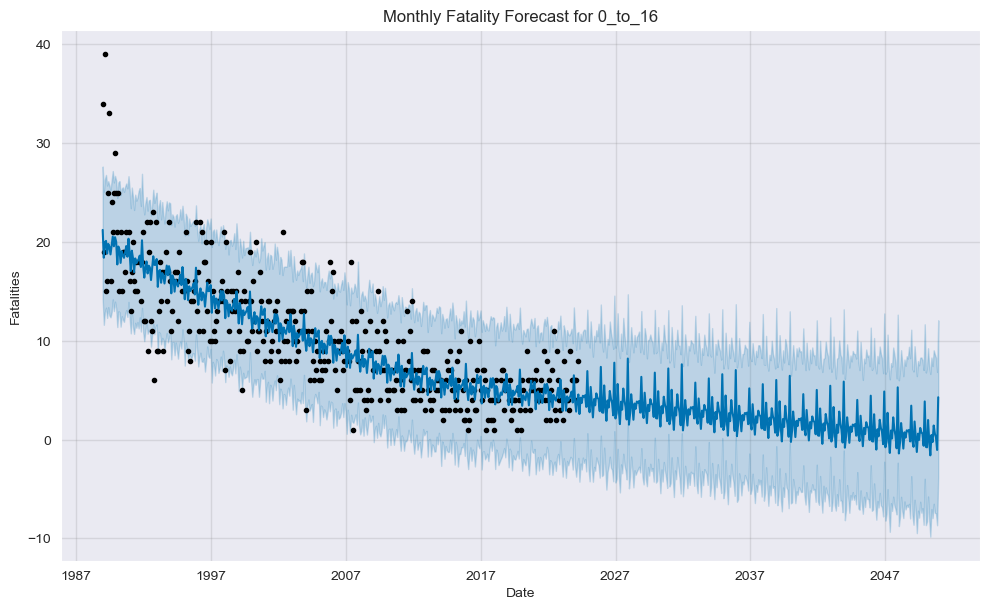

01:19:33 - cmdstanpy - INFO - Chain [1] start processing
01:19:33 - cmdstanpy - INFO - Chain [1] done processing


Predictions for 17_to_25 - Q1 2024:
            ds       yhat  yhat_lower  yhat_upper
420 2024-01-01  15.612019    2.441441   29.813607
421 2024-02-01  11.356077   -2.212341   25.009013
422 2024-03-01  18.687728    5.854423   31.866796


<Figure size 1000x600 with 0 Axes>

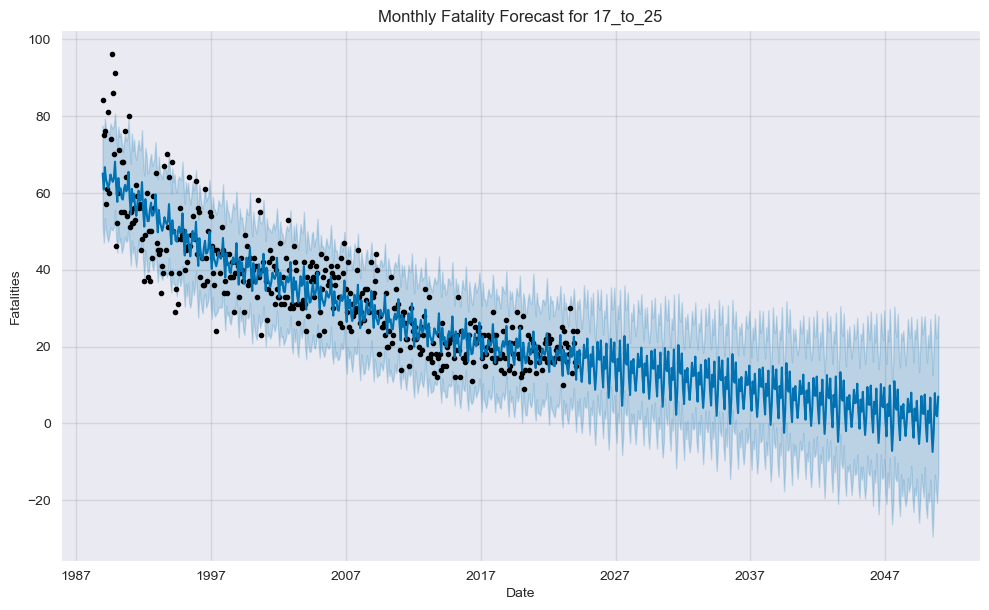

01:19:34 - cmdstanpy - INFO - Chain [1] start processing
01:19:34 - cmdstanpy - INFO - Chain [1] done processing


Predictions for 26_to_39 - Q1 2024:
            ds       yhat  yhat_lower  yhat_upper
420 2024-01-01  19.713082    7.731514   31.156196
421 2024-02-01  18.884985    6.918207   30.022204
422 2024-03-01  22.059496   10.336002   33.740041


<Figure size 1000x600 with 0 Axes>

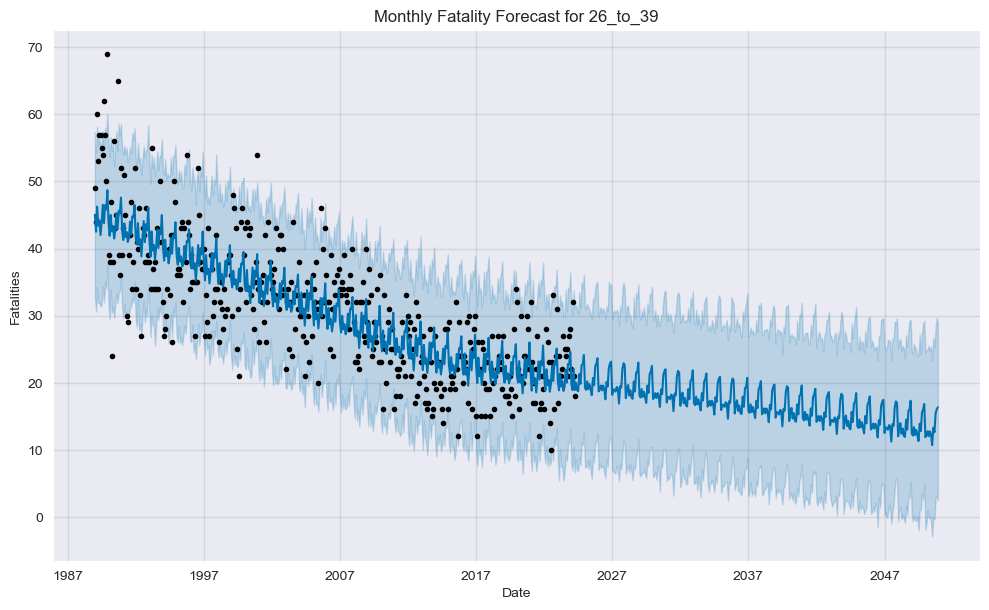

01:19:34 - cmdstanpy - INFO - Chain [1] start processing
01:19:34 - cmdstanpy - INFO - Chain [1] done processing


Predictions for 40_to_64 - Q1 2024:
            ds       yhat  yhat_lower  yhat_upper
420 2024-01-01  29.689520   17.751100   42.338611
421 2024-02-01  28.617545   16.322596   41.588343
422 2024-03-01  31.913471   19.825649   44.687863


<Figure size 1000x600 with 0 Axes>

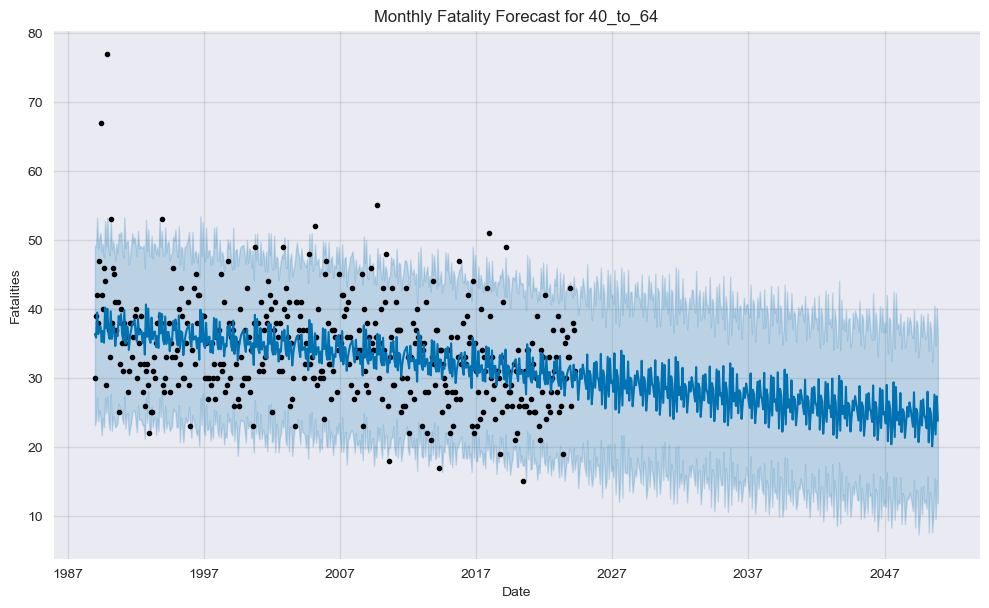

01:19:35 - cmdstanpy - INFO - Chain [1] start processing
01:19:35 - cmdstanpy - INFO - Chain [1] done processing


Predictions for 65_to_74 - Q1 2024:
            ds       yhat  yhat_lower  yhat_upper
420 2024-01-01   8.859106    2.939876   15.136997
421 2024-02-01   8.449716    2.040607   14.655604
422 2024-03-01  10.311428    4.758608   16.835515


<Figure size 1000x600 with 0 Axes>

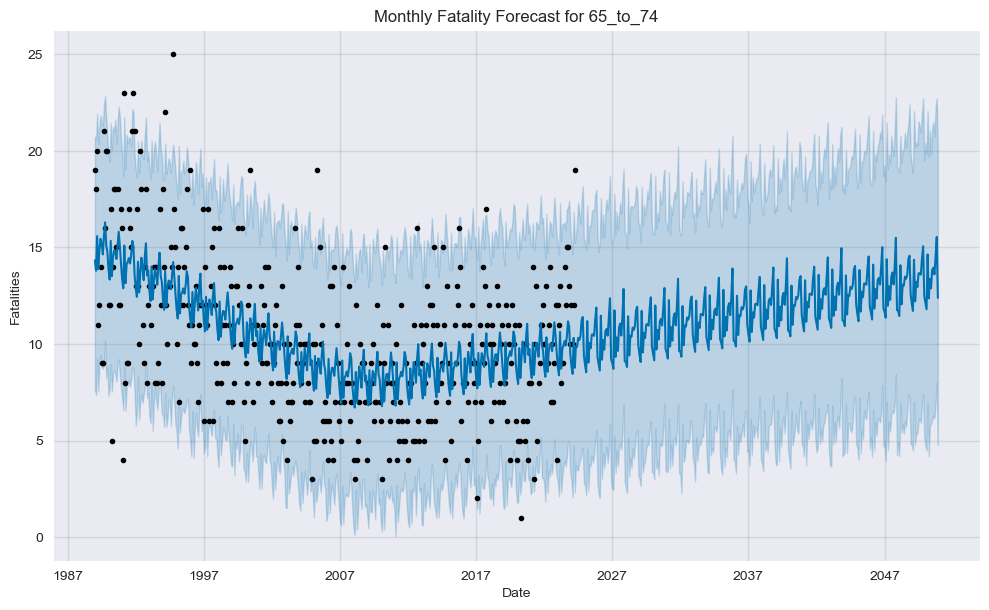

01:19:35 - cmdstanpy - INFO - Chain [1] start processing
01:19:35 - cmdstanpy - INFO - Chain [1] done processing


Predictions for 75_or_older - Q1 2024:
            ds       yhat  yhat_lower  yhat_upper
420 2024-01-01  10.345181    3.113197   18.090140
421 2024-02-01   9.397142    2.055062   16.892618
422 2024-03-01  12.036258    5.264475   19.968561


<Figure size 1000x600 with 0 Axes>

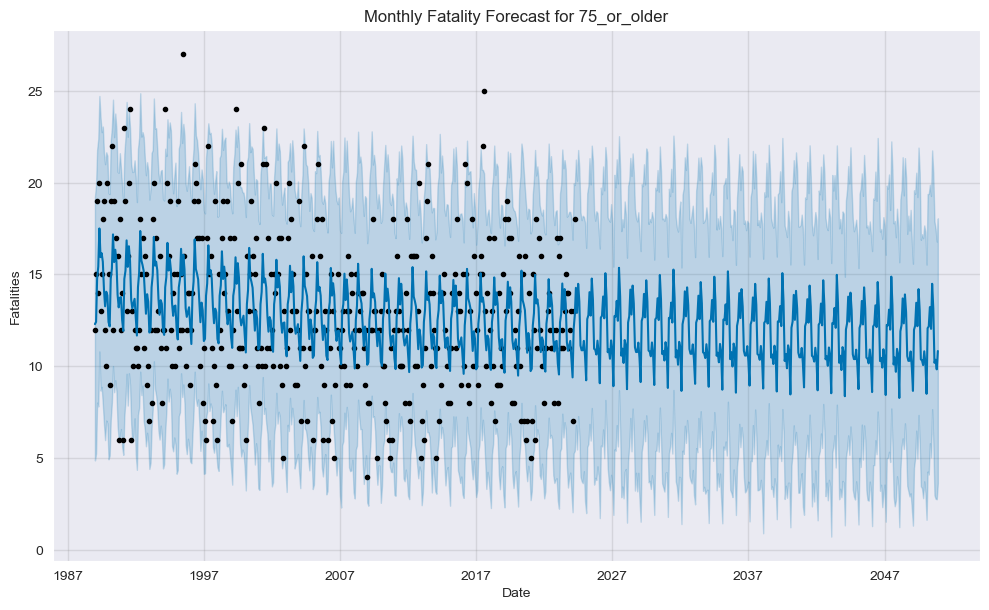

01:19:36 - cmdstanpy - INFO - Chain [1] start processing
01:19:36 - cmdstanpy - INFO - Chain [1] done processing


Predictions for -9 - Q1 2024:
           ds      yhat  yhat_lower  yhat_upper
68 2024-01-01  2.670410    1.143042    4.277787
69 2024-02-01  2.674764    1.094998    4.324909
70 2024-03-01  1.820000    0.139372    3.465896


<Figure size 1000x600 with 0 Axes>

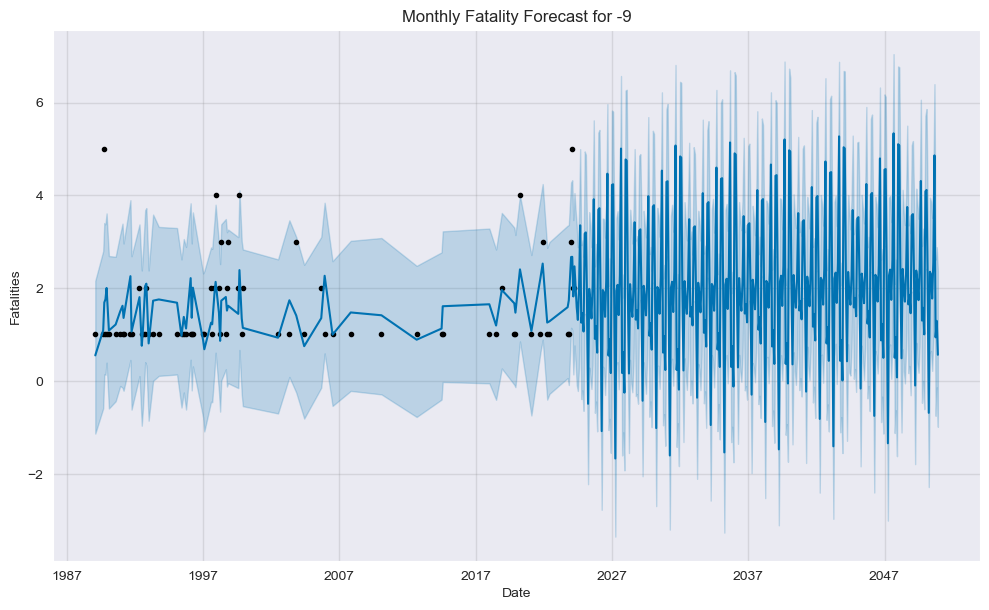

In [5]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error


# اطمینان از نوع داده‌ای صحیح ستون‌ها
data['Year'] = data['Year'].astype(int)
data['Month'] = data['Month'].astype(int)
data['Age Group'] = data['Age Group'].astype(str)

# ایجاد ستون تاریخ از سال و ماه
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(Day=1))

# تجمیع داده‌ها بر اساس تاریخ و گروه سنی
fatalities_by_age_month = data.groupby(['Date', 'Age Group']).size().reset_index(name='Fatalities')

# آماده‌سازی یک دیکشنری برای ذخیره پیش‌بینی‌ها
forecasts = {}

# لیست گروه‌های سنی در دیتاست
age_groups = fatalities_by_age_month['Age Group'].unique()

# افق پیش‌بینی (ماه‌ها)
latest_date = fatalities_by_age_month['Date'].max()
forecast_horizon = (2050 - latest_date.year) * 12 + (12 - latest_date.month)

# دوره آموزشی تا پایان سال 2022
train_end_date = '2022-12-31'

for age_group in age_groups:
    # آماده‌سازی داده‌ها برای Prophet
    age_data = fatalities_by_age_month[fatalities_by_age_month['Age Group'] == age_group][['Date', 'Fatalities']]
    age_data.columns = ['ds', 'y']
    
    # تقسیم داده‌ها به داده‌های آموزشی و آزمایشی
    train_data = age_data[age_data['ds'] <= train_end_date]
    test_data = age_data[(age_data['ds'] > train_end_date) & (age_data['ds'] <= '2023-12-31')]

    # ایجاد و آموزش مدل Prophet
    model = Prophet(
        interval_width=0.95,
        yearly_seasonality=True,
        daily_seasonality=False,
        weekly_seasonality=False
    )
    model.fit(train_data)

    # ایجاد یک DataFrame برای نگهداری تاریخ‌های آینده
    future = model.make_future_dataframe(periods=forecast_horizon, freq='M')

    # انجام پیش‌بینی
    forecast = model.predict(future)

    # ذخیره پیش‌بینی در دیکشنری
    forecasts[age_group] = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

    # ارزیابی مدل برای سال 2023
    forecast_2023 = forecast[(forecast['ds'] >= '2023-01-01') & (forecast['ds'] <= '2023-12-31')]
    test_data = test_data.set_index('ds')
    forecast_2023 = forecast_2023.set_index('ds')
    
    mae = mean_absolute_error(test_data['y'], forecast_2023['yhat'])
    mse = mean_squared_error(test_data['y'], forecast_2023['yhat'])
    rmse = mean_squared_error(test_data['y'], forecast_2023['yhat'], squared=False)
    
    print(f'Evaluation for {age_group} - Year 2023:')
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')

    # رسم نمودار پیش‌بینی
    plt.figure(figsize=(10, 6))
    model.plot(forecast)
    plt.title(f'Monthly Fatality Forecast for {age_group}')
    plt.xlabel('Date')
    plt.ylabel('Fatalities')
    plt.show()
